In [705]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np

In [706]:
G = nx.DiGraph()
df = pd.read_csv('final_2024.csv')
week_num = 4

In [707]:
df

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,...,ACrs.1,AInt.2,ATklW.1,APKwon,APKcon,AOG,ARecov,AWon,ALost.1,AWon%
0,1.0,Fri,2023-08-11,20:00,Burnley,0.3,0–3,1.9,Manchester City,21572.0,...,15,4,12,0,0,0,54,13,13,50.0
1,1.0,Sat,2023-08-12,12:30,Arsenal,0.8,2–1,1.2,Nott'ham Forest,59984.0,...,6,8,10,0,0,0,34,20,12,62.5
2,1.0,Sat,2023-08-12,15:00,Everton,2.7,0–1,1.5,Fulham,39940.0,...,11,4,4,0,0,0,43,14,9,60.9
3,1.0,Sat,2023-08-12,15:00,Sheffield Utd,0.5,0–1,1.9,Crystal Palace,31194.0,...,17,4,9,0,0,0,55,31,13,70.5
4,1.0,Sat,2023-08-12,15:00,Brighton,4.0,4–1,1.5,Luton Town,31872.0,...,22,9,12,0,1,0,41,21,12,63.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,38.0,Sun,2024-05-19,16:00,Brentford,1.1,2–4,3.4,Newcastle Utd,17124.0,...,8,8,10,0,0,0,56,4,9,30.8
376,38.0,Sun,2024-05-19,16:00,Chelsea,1.1,2–1,2.2,Bournemouth,39724.0,...,20,12,16,0,0,0,49,14,12,53.8
377,38.0,Sun,2024-05-19,16:00,Crystal Palace,2.5,5–0,0.9,Aston Villa,25191.0,...,10,2,2,0,0,0,28,9,9,50.0
378,38.0,Sun,2024-05-19,16:00,Liverpool,4.5,2–0,0.5,Wolves,60059.0,...,5,3,11,0,0,0,35,4,14,22.2


In [708]:
teams = (df['Home'].unique())

### Domination Index = Team 1 (% possession + % corners + % lead duration) vs Team 2 (% possession + % corners + % lead duration)

In [709]:
home_columns = ['HAtt 3rd', 'HAtt Pen', 'HSucc', 'HSucc%', 'HPrgC', 'HCPA', 'HPrgDist', 'HPrgR']
for col in home_columns:
    df[f'{col}_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Normalize Away stats
away_columns = ['AAtt 3rd', 'AAtt Pen', 'ASucc', 'ASucc%', 'APrgC', 'ACPA', 'APrgDist', 'APrgR']
for col in away_columns:
    df[f'{col}_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Compute the normalized cost
df['cost'] = (
    df[[f'{col}_norm' for col in home_columns]].sum(axis=1) +
    df[[f'{col}_norm' for col in away_columns]].sum(axis=1)
)

print(df[['cost']])

         cost
0    3.564524
1    4.611741
2    5.174512
3    5.544989
4    5.107044
..        ...
375  5.342162
376  7.363485
377  4.625249
378  6.549740
379  4.409562

[380 rows x 1 columns]


In [710]:
df['cost'] = (df['HAtt 3rd'] + df['HAtt Pen'] + df['HSucc'] + df['HSucc%'] + df['HPrgC'] + df['HCPA'] + df['HPrgDist'] + df['HPrgR']) + (df['AAtt 3rd'] + df['AAtt Pen'] + df['ASucc'] + df['ASucc%'] + df['APrgC'] + df['ACPA'] + df['APrgDist'] + df['APrgR'])

In [711]:
df['cost'] = (df['HCmp%'] - df['ACmp%']) + (df['HSucc%'] - df['HSucc%'])

In [712]:
print(list(df.columns))

['Wk', 'Day', 'Date', 'Time', 'Home', 'xG', 'Score', 'xG.1', 'Away', 'Attendance', 'Venue', 'Referee', 'MatchReportURL', 'match_id', 'Home Score', 'Away Score', 'Winner', 'HMin', 'HGls', 'HAst', 'HPK', 'HPKatt', 'HSh', 'HSoT', 'HCrdY', 'HCrdR', 'HTouches', 'HTkl', 'HInt', 'HBlocks', 'HxG', 'HnpxG', 'HxAG', 'HSCA', 'HGCA', 'HCmp', 'HAtt', 'HCmp%', 'HPrgP', 'HCarries', 'HPrgC', 'HAtt.1', 'HSucc', 'HMin.1', 'HCmp.1', 'HAtt.2', 'HCmp%.1', 'HTotDist', 'HPrgDist', 'HCmp.2', 'HAtt.3', 'HCmp%.2', 'HCmp.3', 'HAtt.4', 'HCmp%.3', 'HCmp.4', 'HAtt.5', 'HCmp%.4', 'HAst.1', 'HxAG.1', 'HxA', 'HKP', 'H1/3', 'HPPA', 'HCrsPA', 'HPrgP.1', 'HMin.2', 'HAtt.6', 'HLive', 'HDead', 'HFK', 'HTB', 'HSw', 'HCrs', 'HTI', 'HCK', 'HIn', 'HOut', 'HStr', 'HCmp.5', 'HOff', 'HBlocks.1', 'HMin.3', 'HTkl.1', 'HTklW', 'HDef 3rd', 'HMid 3rd', 'HAtt 3rd', 'HTkl.2', 'HAtt.7', 'HTkl%', 'HLost', 'HBlocks.2', 'HSh.1', 'HPass', 'HInt.1', 'HTkl+Int', 'HClr', 'HErr', 'HMin.4', 'HTouches.1', 'HDef Pen', 'HDef 3rd.1', 'HMid 3rd.1', 'H

In [713]:
last_three = [week_num-3,week_num-2,week_num-1]

week_1_df = df[df['Wk'].isin(last_three)]
edgelist = list(zip(week_1_df['Home'], week_1_df['Away'], week_1_df['cost']))

mod_edgelist = []
for t in edgelist:
    if t[2] < 0:
        modified_tuple = (t[0], t[1], round(abs(t[2]), 2))
    else:
        modified_tuple = (t[1], t[0], round(t[2], 2))

    mod_edgelist.append(modified_tuple)


nodelist = pd.unique(df['Home'])
# Assuming week_1_df is a pandas DataFrame with columns 'Home', 'Away', and 'cost'
weightlist = dict(zip(zip(mod_edgelist[0], mod_edgelist[1]), mod_edgelist[2]))


for team1, team2, weight in mod_edgelist:
    G.add_edge(team1, team2, weight=weight)
    # G.add_edge(team2, team1, weight=-weight)


edge_labels = nx.get_edge_attributes(G, 'weight')

In [714]:
incoming_weights = {
    node: sum(data['weight'] for _, _, data in G.in_edges(node, data=True))
    for node in G.nodes
}
print(incoming_weights)

{'Burnley': 6.800000000000001, 'Manchester City': 32.0, "Nott'ham Forest": 2.0, 'Arsenal': 37.5, 'Everton': 0, 'Fulham': 9.9, 'Sheffield Utd': 0, 'Crystal Palace': 21.1, 'Luton Town': 0, 'Brighton': 44.4, 'West Ham': 0, 'Bournemouth': 12.0, 'Aston Villa': 10.1, 'Newcastle Utd': 7.300000000000001, 'Brentford': 3.4, 'Tottenham': 26.8, 'Liverpool': 13.1, 'Chelsea': 40.9, 'Wolves': 4.7, 'Manchester Utd': 14.4}


In [715]:
rankings = {}

incoming_weights = {
    node: sum(data['weight'] for _, _, data in G.in_edges(node, data=True))
    for node in G.nodes
}

sorted_by_value = dict(sorted(incoming_weights.items(), key=lambda item: item[1], reverse=True))


for i, (key, value) in enumerate(incoming_weights.items(), start=1):
    rankings[key] = i

In [716]:
pagerank = nx.pagerank(G, weight='weight')


rankings = {team: rank for rank, (team, score) in enumerate(sorted(pagerank.items(), key=lambda item: item[1], reverse=True), start=1)}


In [717]:
rankings

{'Tottenham': 1,
 'Manchester City': 2,
 'Brentford': 3,
 'Crystal Palace': 4,
 'Arsenal': 5,
 'Brighton': 6,
 'Chelsea': 7,
 'Burnley': 8,
 'Newcastle Utd': 9,
 'Fulham': 10,
 'Liverpool': 11,
 'Manchester Utd': 12,
 'Aston Villa': 13,
 'Bournemouth': 14,
 'Wolves': 15,
 "Nott'ham Forest": 16,
 'Everton': 17,
 'Sheffield Utd': 18,
 'Luton Town': 19,
 'West Ham': 20}

In [718]:
def project_winner(row):
    home_rank = rankings.get(row["Home"], float('inf'))
    away_rank = rankings.get(row["Away"], float('inf'))
    
    # Project a tie if the ranks are within 3 spots
    if abs(home_rank - away_rank) <= 3:
        return "Draw"
    elif home_rank > away_rank:
        return "Home"
    else:
        return "Away"

In [719]:
accuracy_list = []
i = 4
pagerank = nx.pagerank(G, weight='weight')

rankings = {team: rank for rank, (team, score) in enumerate(sorted(pagerank.items(), key=lambda item: item[1], reverse=True), start=1)}

test_week = df[df['Wk'].isin([week_num])].copy()  # Use .copy() to avoid the warning
test_week.loc[:, "Projected Winner"] = test_week.apply(project_winner, axis=1)
correct_predictions = (test_week["Projected Winner"] == test_week["Winner"]).sum()
total_predictions = len(test_week)
accuracy = (correct_predictions / total_predictions) * 100
print(f"Accuracy of projected winners: {accuracy:.2f}%")
accuracy_list.append(accuracy)

Accuracy of projected winners: 20.00%


In [720]:
np.mean(accuracy_list)

20.0

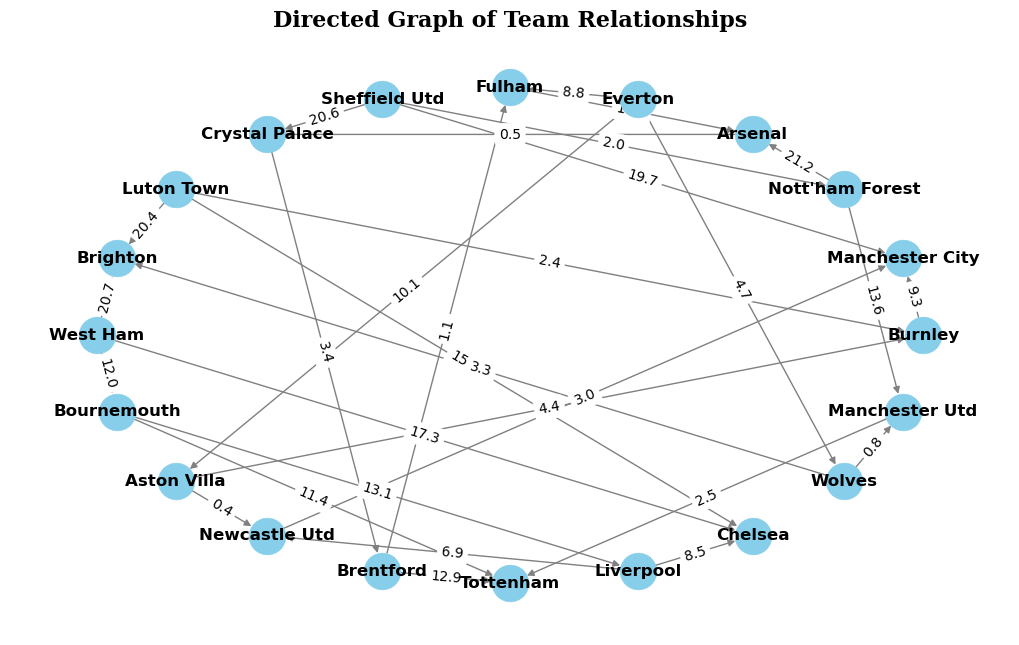

In [721]:
pos = nx.circular_layout(G)
plt.figure(figsize=(10, 6))

nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, font_size=12, font_color='black', font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Directed Graph of Team Relationships")
plt.show()

In [722]:
df

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,...,HPrgR_norm,AAtt 3rd_norm,AAtt Pen_norm,ASucc_norm,ASucc%_norm,APrgC_norm,ACPA_norm,APrgDist_norm,APrgR_norm,cost
0,1.0,Fri,2023-08-11,20:00,Burnley,0.3,0–3,1.9,Manchester City,21572.0,...,0.115044,0.181818,0.333333,0.136364,0.37500,0.18,0.157895,0.716361,0.261905,-9.3
1,1.0,Sat,2023-08-12,12:30,Arsenal,0.8,2–1,1.2,Nott'ham Forest,59984.0,...,0.469027,0.090909,0.129630,0.318182,0.48625,0.16,0.105263,0.271636,0.095238,21.2
2,1.0,Sat,2023-08-12,15:00,Everton,2.7,0–1,1.5,Fulham,39940.0,...,0.212389,0.090909,0.240741,0.272727,0.68125,0.22,0.105263,0.645610,0.380952,-8.8
3,1.0,Sat,2023-08-12,15:00,Sheffield Utd,0.5,0–1,1.9,Crystal Palace,31194.0,...,0.132743,0.545455,0.481481,0.590909,0.85500,0.30,0.263158,0.815856,0.428571,-20.6
4,1.0,Sat,2023-08-12,15:00,Brighton,4.0,4–1,1.5,Luton Town,31872.0,...,0.522124,0.181818,0.259259,0.045455,0.11375,0.20,0.263158,0.371131,0.250000,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,38.0,Sun,2024-05-19,16:00,Brentford,1.1,2–4,3.4,Newcastle Utd,17124.0,...,0.318584,0.363636,0.444444,0.590909,0.70625,0.48,0.263158,0.324384,0.285714,2.9
376,38.0,Sun,2024-05-19,16:00,Chelsea,1.1,2–1,2.2,Bournemouth,39724.0,...,0.300885,0.636364,0.574074,0.363636,0.43500,0.30,0.368421,0.383765,0.285714,5.3
377,38.0,Sun,2024-05-19,16:00,Crystal Palace,2.5,5–0,0.9,Aston Villa,25191.0,...,0.353982,0.000000,0.111111,0.227273,0.62500,0.14,0.105263,0.396715,0.059524,2.1
378,38.0,Sun,2024-05-19,16:00,Liverpool,4.5,2–0,0.5,Wolves,60059.0,...,0.628319,0.181818,0.111111,0.681818,0.69500,0.22,0.315789,0.233733,0.107143,13.9


In [723]:
df = pd.read_csv('final_2024.csv')  # Load your data

# Iterate over the columns and compare them
cols_to_drop = []

for col1 in df.columns:
    for col2 in df.columns:
        # Skip comparison with itself
        if col1 != col2:
            # Check if all values in col1 are equal to col2
            if df[col1].equals(df[col2]):
                cols_to_drop.append(col2)

# Remove duplicate columns
df_cleaned = df.drop(columns=set(cols_to_drop))
print(cols_to_drop)
# Show the cleaned dataframe
print(df_cleaned)

['HMin.1', 'HMin.2', 'HMin.3', 'HMin.4', 'HMin.5', 'HAst.1', 'APKcon', 'HCrdY.1', 'HCrdR.1', 'HTouches.1', 'HTkl.1', 'HInt.1', 'HInt.2', 'HBlocks.2', 'HxAG.1', 'HCmp.1', 'HCmp.5', 'HAtt.2', 'HAtt.6', 'HCmp%.1', 'HPrgP.1', 'HCarries.1', 'HPrgC.1', 'HAtt.8', 'HSucc.1', 'ALost', 'HMin', 'HMin.2', 'HMin.3', 'HMin.4', 'HMin.5', 'HCmp', 'HCmp.5', 'HAtt', 'HAtt.6', 'HCmp%', 'HAst', 'HxAG', 'HPrgP', 'HMin', 'HMin.1', 'HMin.3', 'HMin.4', 'HMin.5', 'HAtt', 'HAtt.2', 'HCrs.1', 'HCmp', 'HCmp.1', 'HOff.1', 'HMin', 'HMin.1', 'HMin.2', 'HMin.4', 'HMin.5', 'HTkl', 'HTklW.1', 'ATkld', 'ASucc', 'ASucc.1', 'HBlocks', 'HInt', 'HInt.2', 'HMin', 'HMin.1', 'HMin.2', 'HMin.3', 'HMin.5', 'HTouches', 'HAtt.1', 'HSucc', 'ALost', 'ATkl.2', 'HCarries', 'HPrgC', 'HMin', 'HMin.1', 'HMin.2', 'HMin.3', 'HMin.4', 'HCrdY', 'HCrdR', 'HOff', 'HCrs', 'HInt', 'HInt.1', 'HTklW', 'APKatt', 'ALost.1', 'AWon', 'AMin.1', 'AMin.2', 'AMin.3', 'AMin.4', 'AMin.5', 'AAst.1', 'HPKcon', 'ACrdY.1', 'ACrdR.1', 'ATouches.1', 'ATkl.1', 'AI

## Back Test

In [724]:
bet_df = pd.read_csv('betting odds.csv')
cummulative_df = pd.read_csv('cummulative.csv')

In [725]:
bet_df['Date'] = pd.to_datetime(bet_df['Date'], format='%d/%m/%Y')
bet_df.rename(columns={'HomeTeam': 'Home', 'AwayTeam': 'Away'}, inplace=True)
bet_df = bet_df[['Date', 'Home', 'Away','B365H', 'B365D', 'B365A']]

In [726]:
cummulative_df['Date'] = pd.to_datetime(cummulative_df['Date'])

In [727]:
bet_df = bet_df[bet_df['Date'] >= '2023-09-01']

In [728]:
bet_df

,Date,Home,Away,B365H,B365D,B365A
29,2023-09-01,Luton,West Ham,4.75,3.80,1.73
30,2023-09-02,Sheffield United,Everton,2.90,3.25,2.50
31,2023-09-02,Brentford,Bournemouth,1.73,3.80,4.75
32,2023-09-02,Burnley,Tottenham,3.60,4.00,1.85
33,2023-09-02,Chelsea,Nott'm Forest,1.40,4.50,8.50
...,...,...,...,...,...,...
375,2024-05-19,Crystal Palace,Aston Villa,1.85,4.33,3.60
376,2024-05-19,Liverpool,Wolves,1.17,8.00,15.00
377,2024-05-19,Luton,Fulham,2.90,3.90,2.20
378,2024-05-19,Man City,West Ham,1.08,12.00,21.00


In [729]:
cummulative_df_slim = cummulative_df[['Wk','Date','Home','Away','Projected Winner','Winner']]

In [730]:
bet_df['Home'] = bet_df['Home'].replace("Nott'm Forest", "Nott'ham Forest")
bet_df['Away'] = bet_df['Away'].replace("Nott'm Forest", "Nott'ham Forest")
bet_df['Home'] = bet_df['Home'].replace("Luton", "Luton Town")
bet_df['Away'] = bet_df['Away'].replace("Luton", "Luton Town")
bet_df['Home'] = bet_df['Home'].replace("Sheffield United", "Sheffield Utd")
bet_df['Away'] = bet_df['Away'].replace("Sheffield United", "Sheffield Utd")
bet_df['Home'] = bet_df['Home'].replace("Man City", "Manchester City")
bet_df['Away'] = bet_df['Away'].replace("Man City", "Manchester City")
bet_df['Home'] = bet_df['Home'].replace("Newcastle", "Newcastle Utd")
bet_df['Away'] = bet_df['Away'].replace("Newcastle", "Newcastle Utd")
bet_df['Home'] = bet_df['Home'].replace("Man United", "Manchester Utd")
bet_df['Away'] = bet_df['Away'].replace("Man United", "Manchester Utd")

In [731]:
merged_df = pd.merge(cummulative_df_slim, bet_df, on=['Date', 'Home', 'Away'],how='left')
merged_df.rename(columns={'B365H': 'home_odds', 'B365D': 'draw_odds', 'B365A': 'away_odds'}, inplace=True)
merged_df

,Wk,Date,Home,Away,Projected Winner,Winner,home_odds,draw_odds,away_odds
0,4.0,2023-09-01,Luton Town,West Ham,Away,Away,4.75,3.80,1.73
1,4.0,2023-09-02,Sheffield Utd,Everton,Away,Draw,2.90,3.25,2.50
2,4.0,2023-09-02,Chelsea,Nott'ham Forest,Home,Away,1.40,4.50,8.50
3,4.0,2023-09-02,Manchester City,Fulham,Home,Home,1.17,8.00,15.00
4,4.0,2023-09-02,Brentford,Bournemouth,Home,Draw,1.73,3.80,4.75
...,...,...,...,...,...,...,...,...,...
345,38.0,2024-05-19,Brentford,Newcastle Utd,Away,Away,2.90,3.90,2.20
346,38.0,2024-05-19,Chelsea,Bournemouth,Home,Home,1.45,5.00,6.00
347,38.0,2024-05-19,Crystal Palace,Aston Villa,Away,Home,1.85,4.33,3.60
348,38.0,2024-05-19,Liverpool,Wolves,Home,Home,1.17,8.00,15.00


In [732]:
def assign_successful_bet(row):
    if row['Winner'] == 'Home':
        return row['home_odds']
    elif row['Winner'] == 'Draw':
        return row['draw_odds']
    elif row['Winner'] == 'Away':
        return row['away_odds']
    return None  # Handle cases where 'winner' is not one of the expected values

# Apply the function to create a new column
merged_df['successful_bet_odds'] = merged_df.apply(assign_successful_bet, axis=1)

In [733]:
merged_df

,Wk,Date,Home,Away,Projected Winner,Winner,home_odds,draw_odds,away_odds,successful_bet_odds
0,4.0,2023-09-01,Luton Town,West Ham,Away,Away,4.75,3.80,1.73,1.73
1,4.0,2023-09-02,Sheffield Utd,Everton,Away,Draw,2.90,3.25,2.50,3.25
2,4.0,2023-09-02,Chelsea,Nott'ham Forest,Home,Away,1.40,4.50,8.50,8.50
3,4.0,2023-09-02,Manchester City,Fulham,Home,Home,1.17,8.00,15.00,1.17
4,4.0,2023-09-02,Brentford,Bournemouth,Home,Draw,1.73,3.80,4.75,3.80
...,...,...,...,...,...,...,...,...,...,...
345,38.0,2024-05-19,Brentford,Newcastle Utd,Away,Away,2.90,3.90,2.20,2.20
346,38.0,2024-05-19,Chelsea,Bournemouth,Home,Home,1.45,5.00,6.00,1.45
347,38.0,2024-05-19,Crystal Palace,Aston Villa,Away,Home,1.85,4.33,3.60,1.85
348,38.0,2024-05-19,Liverpool,Wolves,Home,Home,1.17,8.00,15.00,1.17


In [734]:
def backtest(df, bet_amount=10):
    """
    Backtest model performance using winner, projected_winner, and odds.

    Args:
    - df (DataFrame): DataFrame with columns 'winner', 'projected_winner', and 'odds'.
    - bet_amount (float): Fixed bet amount for each prediction.

    Returns:
    - result (dict): Metrics including total bets, total returns, net profit, ROI, and accuracy.
    """
    # Add a success column (1 if prediction is correct, 0 otherwise)
    df['success'] = df['Projected Winner'] == df['Winner']
    
    # Calculate profit/loss for each row
    df['profit'] = df.apply(
        lambda row: (row['successful_bet_odds'] - 1) * bet_amount if row['success'] else -bet_amount, axis=1
    )
    
    # Calculate metrics
    total_bets = len(df) * bet_amount
    total_returns = df['profit'].sum() + total_bets
    net_profit = df['profit'].sum()
    roi = (net_profit / total_bets) * 100
    accuracy = df['success'].mean() * 100

    result = {
        'total_bets': total_bets,
        'total_returns': total_returns,
        'net_profit': net_profit,
        'roi': roi,
        'accuracy': accuracy
    }

    return result, df

# Backtest and display results
results, updated_df = backtest(merged_df)
print(results)

{'total_bets': 3500, 'total_returns': 3403.3, 'net_profit': -96.69999999999997, 'roi': -2.7628571428571425, 'accuracy': 54.85714285714286}


In [737]:
def backtest_dnb(df, bet_amount=10):
    """
    Backtest model performance using winner, projected_winner, and odds with Draw No Bet (DNB).

    Args:
    - df (DataFrame): DataFrame with columns 'Winner', 'Projected Winner', and odds columns.
    - bet_amount (float): Fixed bet amount for each prediction.

    Returns:
    - result (dict): Metrics including total bets, total returns, net profit, ROI, and accuracy.
    - updated_df (DataFrame): Updated DataFrame with success and profit columns.
    """
    # Add a success column (1 if prediction is correct, 0 otherwise)
    df['success'] = df['Projected Winner'] == df['Winner']
    
    # Add a draw column (1 if match ends in a draw, 0 otherwise)
    df['is_draw'] = df['Winner'] == 'Draw'
    
    # Calculate profit/loss for each row
    def calculate_profit(row):
        if row['is_draw']:
            return 0  # Bet is voided, no profit or loss
        elif row['success']:
            return (row['successful_bet_odds'] - 1) * bet_amount  # Profit for correct prediction
        else:
            return -bet_amount  # Loss for incorrect prediction

    df['profit'] = df.apply(calculate_profit, axis=1)
    
    # Calculate metrics
    total_bets = len(df) * bet_amount
    total_returns = df['profit'].sum() + total_bets
    net_profit = df['profit'].sum()
    roi = (net_profit / total_bets) * 100
    accuracy = df['success'].mean() * 100

    result = {
        'total_bets': total_bets,
        'total_returns': total_returns,
        'net_profit': net_profit,
        'roi': roi,
        'accuracy': accuracy
    }

    return result, df

# Example usage
results, updated_df = backtest_dnb(merged_df)

# Display results
print("Backtest Results (Draw No Bet):")
print(results)

Backtest Results (Draw No Bet):
{'total_bets': 3500, 'total_returns': 4173.3, 'net_profit': 673.3, 'roi': 19.237142857142857, 'accuracy': 54.85714285714286}


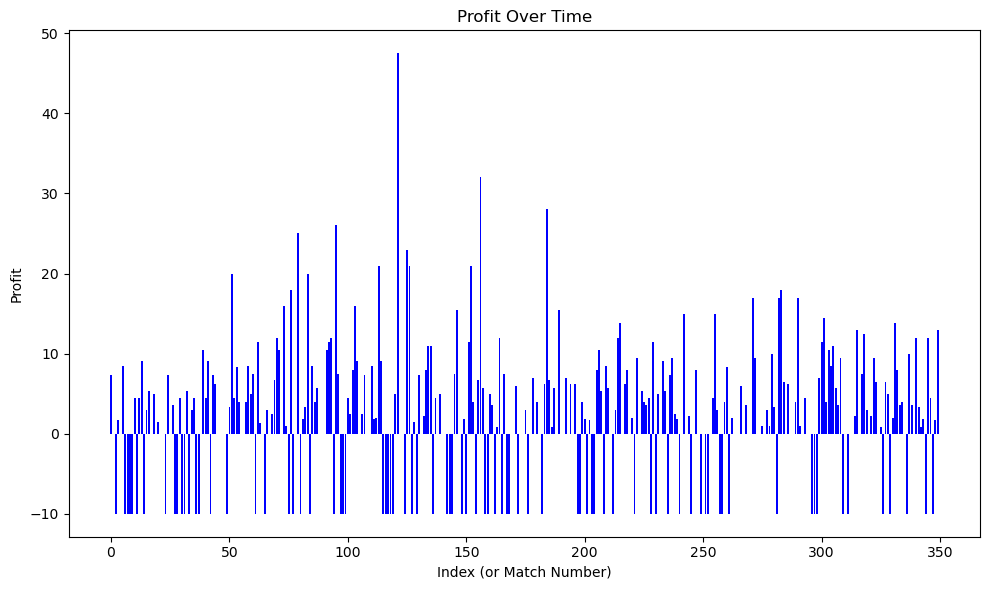

In [524]:
import matplotlib.pyplot as plt

# Assuming 'updated_df' contains a 'profit' column
plt.figure(figsize=(10, 6))

# Plotting the 'profit' column as a bar chart
plt.bar(updated_df.index, updated_df['profit'], color='blue')  # Use 'updated_df.index' for x-values

# Adding labels and title
plt.title('Profit Over Time')
plt.xlabel('Index (or Match Number)')
plt.ylabel('Profit')

# Displaying the plot
plt.tight_layout()
plt.show()


In [525]:
weekly_profit = updated_df.groupby('Wk')
weekly_profit['profit'].sum()

Wk
4.0    -32.5
5.0     11.3
6.0    -13.3
7.0    -26.7
8.0      7.1
9.0     57.6
10.0    12.4
11.0    62.5
12.0    23.3
13.0    27.5
14.0    49.9
15.0    -7.6
16.0    67.9
17.0    38.9
18.0   -15.2
19.0    40.9
20.0   -11.1
21.0    -4.0
22.0    56.9
23.0     3.4
24.0    -4.2
25.0    38.6
26.0    20.3
27.0    20.5
28.0    -4.8
29.0   -13.6
30.0     9.9
31.0    41.4
32.0    45.0
33.0    -0.6
34.0    68.8
35.0    28.2
36.0    10.5
37.0    35.0
38.0    29.1
Name: profit, dtype: float64

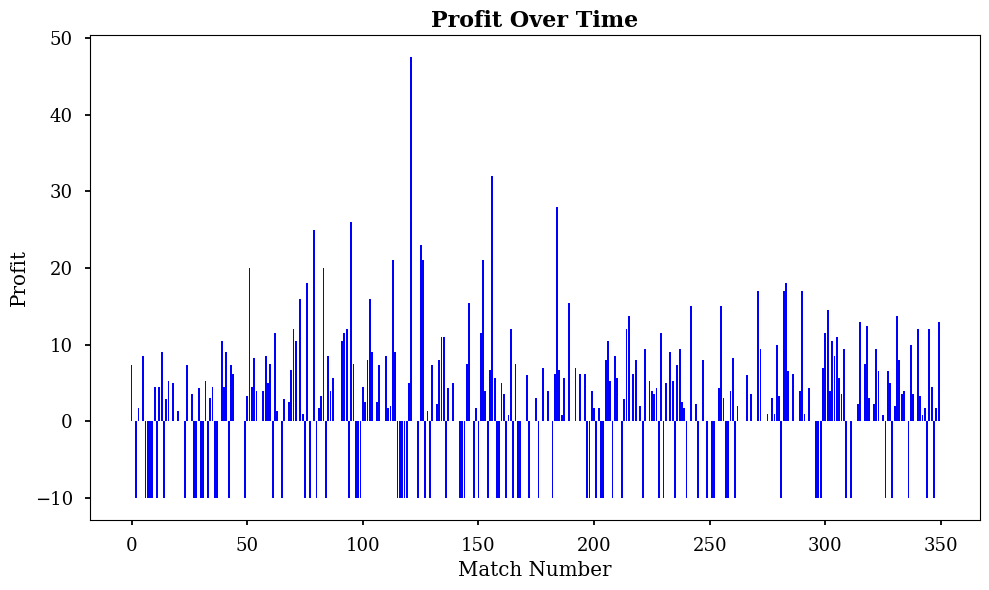

In [607]:
import matplotlib.pyplot as plt


# Assuming 'updated_df' contains a 'profit' column
plt.figure(figsize=(10, 6))

# Plotting the 'profit' column as a bar chart
plt.bar(updated_df.index, updated_df['profit'], color='blue')  # Use 'updated_df.index' for x-values

# Adding labels and title
plt.title('Profit Over Time')
plt.xlabel('Match Number')
plt.ylabel('Profit')

# Displaying the plot
plt.tight_layout()
plt.show()

In [527]:
updated_df

,Wk,Date,Home,Away,Projected Winner,Winner,home_odds,draw_odds,away_odds,successful_bet_odds,success,profit,is_draw
0,4.0,2023-09-01,Luton Town,West Ham,Away,Away,4.75,3.80,1.73,1.73,True,7.3,False
1,4.0,2023-09-02,Sheffield Utd,Everton,Away,Draw,2.90,3.25,2.50,3.25,False,0.0,True
2,4.0,2023-09-02,Chelsea,Nott'ham Forest,Home,Away,1.40,4.50,8.50,8.50,False,-10.0,False
3,4.0,2023-09-02,Manchester City,Fulham,Home,Home,1.17,8.00,15.00,1.17,True,1.7,False
4,4.0,2023-09-02,Brentford,Bournemouth,Home,Draw,1.73,3.80,4.75,3.80,False,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,38.0,2024-05-19,Brentford,Newcastle Utd,Away,Away,2.90,3.90,2.20,2.20,True,12.0,False
346,38.0,2024-05-19,Chelsea,Bournemouth,Home,Home,1.45,5.00,6.00,1.45,True,4.5,False
347,38.0,2024-05-19,Crystal Palace,Aston Villa,Away,Home,1.85,4.33,3.60,1.85,False,-10.0,False
348,38.0,2024-05-19,Liverpool,Wolves,Home,Home,1.17,8.00,15.00,1.17,True,1.7,False


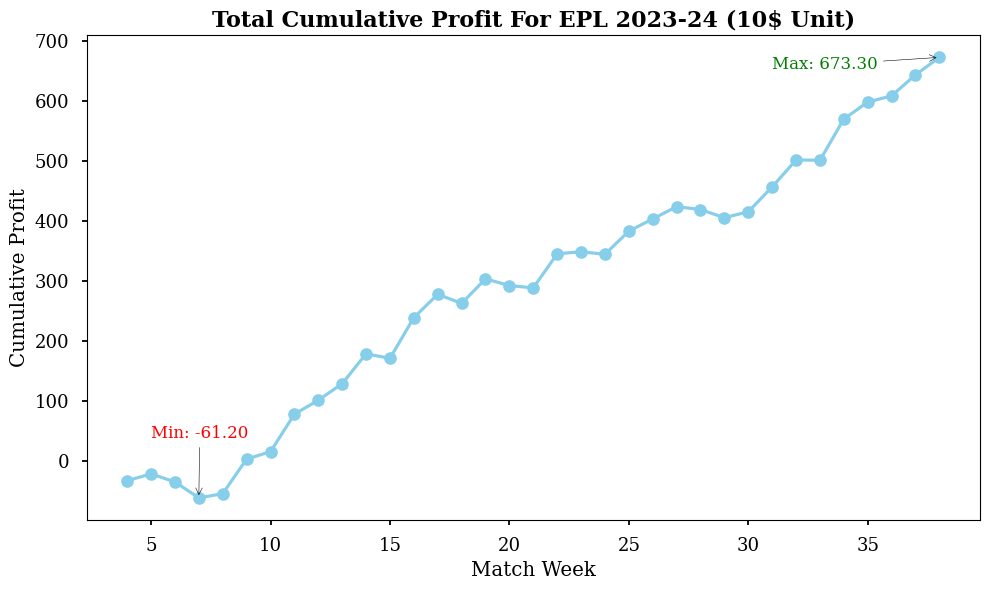

In [770]:
import matplotlib.pyplot as plt

# Assuming 'updated_df' contains 'profit' and 'Wk' columns, where 'Wk' represents the week of each match

# Group by 'Wk' and sum the profit for each week
weekly_profit = updated_df.groupby('Wk')['profit'].sum()

# Calculate cumulative profit over time
cumulative_profit = weekly_profit.cumsum()

# Plotting the cumulative profit as a line plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_profit.index, cumulative_profit.values, color='skyblue', marker='o')

# Find the max and min values
max_value = cumulative_profit.max()
min_value = cumulative_profit.min()

# Get the weeks corresponding to max and min values
max_week = cumulative_profit.idxmax()
min_week = cumulative_profit.idxmin()

# Annotating the max and min values
plt.annotate(f'Max: {max_value:.2f}', xy=(max_week, max_value), xytext=(max_week - 7, max_value - 20),
             arrowprops=dict(facecolor='green', arrowstyle="->"), fontsize=12, color='green')
plt.annotate(f'Min: {min_value:.2f}', xy=(min_week, min_value), xytext=(min_week - 2, min_value + 100),
             arrowprops=dict(facecolor='red', arrowstyle="->"), fontsize=12, color='red')

# Adding labels and title
plt.title('Total Cumulative Profit For EPL 2023-24 (10$ Unit)')
plt.xlabel('Match Week')
plt.ylabel('Cumulative Profit')

# Displaying the plot
plt.tight_layout()
plt.show()


In [529]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [530]:
confusion = confusion_matrix(updated_df['Winner'], updated_df['Projected Winner'], labels=updated_df['Winner'].unique())
confusion_df = pd.DataFrame(confusion, 
                            index=[f"Actual_{label}" for label in updated_df['Winner'].unique()],
                            columns=[f"Predicted_{label}" for label in updated_df['Winner'].unique()])


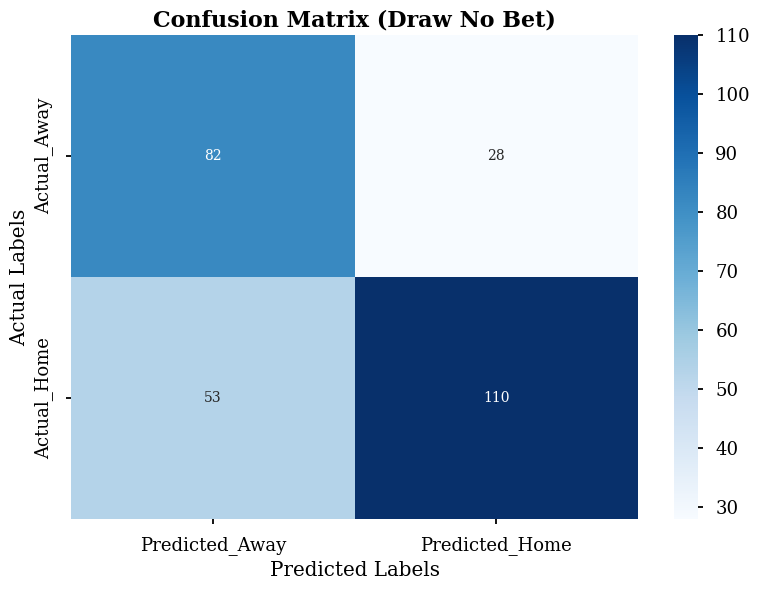

In [604]:
confusion_df_DNB = confusion_df[['Predicted_Away','Predicted_Home']]
confusion_df_DNB = confusion_df_DNB.drop(confusion_df_DNB.index[1])
confusion_df_DNB

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df_DNB, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix (Draw No Bet)')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.tight_layout()
plt.show()

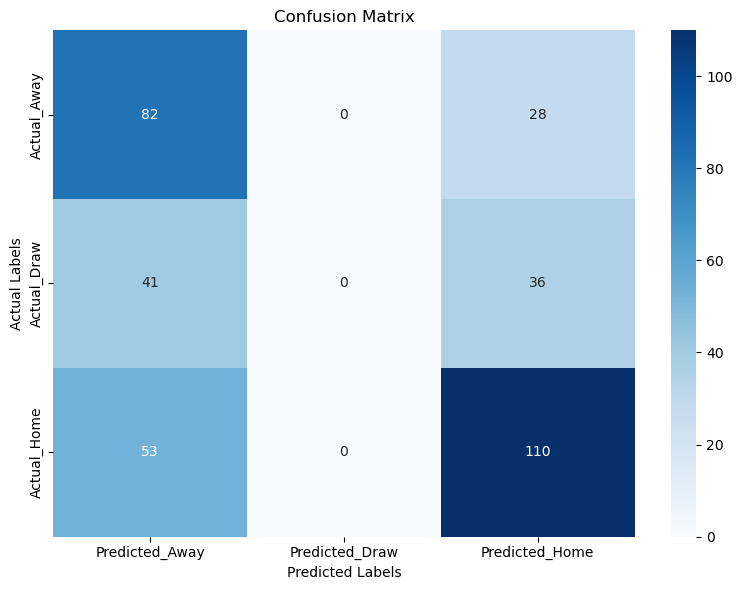

In [532]:

labels = ['Away', 'Draw', 'Home']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Predicted_{l}' for l in labels],
            yticklabels=[f'Actual_{l}' for l in labels], cbar=True)

# Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\jacob.hyatt\AppData\Local\Temp\ipykernel_17488\375827772.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


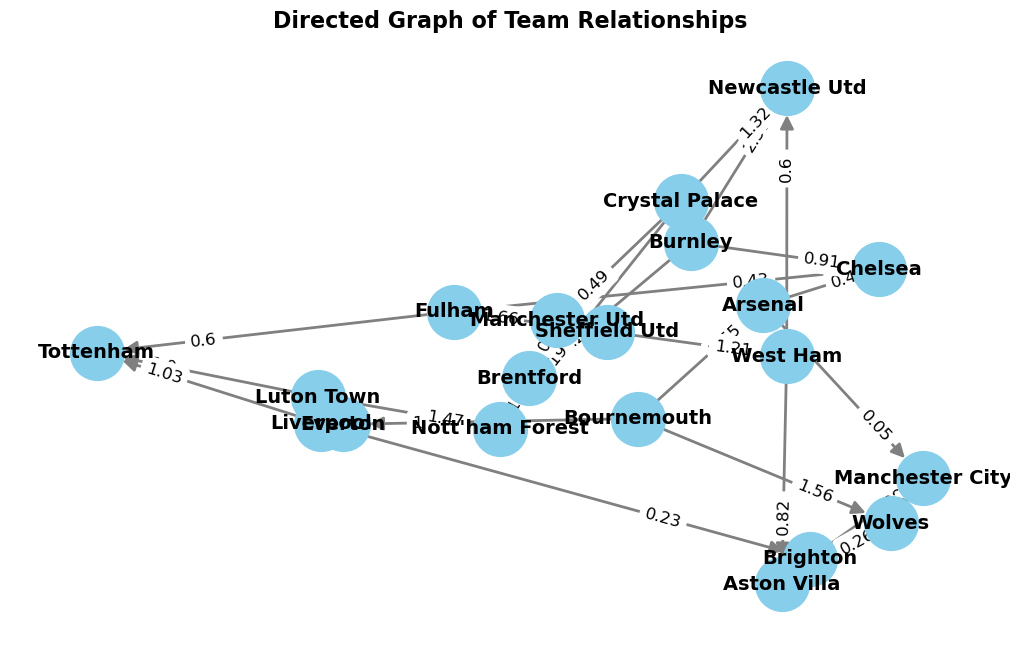

In [533]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Filtering the last three weeks
week_num = 10
last_three = [week_num - 3, week_num - 2, week_num - 1]
week_df = cummulative_df[cummulative_df['Wk'].isin(last_three)]

# Creating the modified edge list
edgelist = list(zip(week_df['Home'], week_df['Away'], week_df['cost']))
mod_edgelist = []
for t in edgelist:
    if t[2] < 0:
        modified_tuple = (t[0], t[1], round(abs(t[2]), 2))
    else:
        modified_tuple = (t[1], t[0], round(t[2], 2))
    mod_edgelist.append(modified_tuple)

# Creating the graph
G = nx.DiGraph()
for team1, team2, weight in mod_edgelist:
    G.add_edge(team1, team2, weight=weight)

# Node list and sizes
nodelist = pd.unique(week_df[['Home', 'Away']].values.ravel())
node_sizes = {team: week_df.loc[week_df['Home'] == team, 'cost'].sum() for team in nodelist}
sizes = [node_sizes.get(team, 100) * 700 for team in nodelist]

# Edge labels and graph visualization
edge_labels = nx.get_edge_attributes(G, 'weight')
pos = nx.spring_layout(G,)  # Seed ensures reproducibility
plt.figure(figsize=(10, 6))

nx.draw(
    G, pos, with_labels=True, node_color='skyblue', node_size=1500,
    font_size=14, font_color='black', font_weight='bold', edge_color='gray',
    width=2, arrowsize=20, arrowstyle='-|>'
)

# Draw edge labels with rotation
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels, font_size=12, label_pos=0.3, rotate=True
)

# Add a title and save as high-resolution image
plt.title("Directed Graph of Team Relationships", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig("team_relationships_graph.png", dpi=300)  # High-resolution
plt.show()

C:\Users\jacob.hyatt\AppData\Local\Temp\ipykernel_17488\2002337874.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


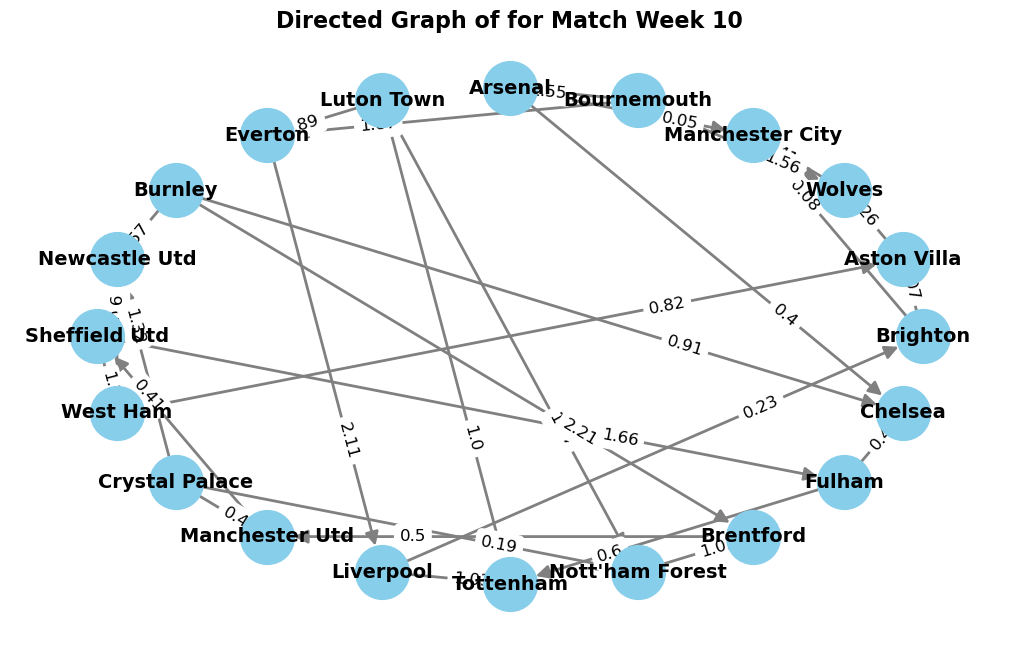

In [534]:
# Edge labels and graph visualization
edge_labels = nx.get_edge_attributes(G, 'weight')
pos = nx.circular_layout(G)  # Seed ensures reproducibility
plt.figure(figsize=(10, 6))

nx.draw(
    G, pos, with_labels=True, node_color='skyblue', node_size=1500,
    font_size=14, font_color='black', font_weight='bold', edge_color='gray',
    width=2, arrowsize=20, arrowstyle='-|>'
)

# Draw edge labels with rotation
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels, font_size=12, label_pos=0.3, rotate=True
)

# Add a title and save as high-resolution image
plt.title("Directed Graph of for Match Week 10", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig("team_relationships_graph.png", dpi=300)  # High-resolution
plt.show()

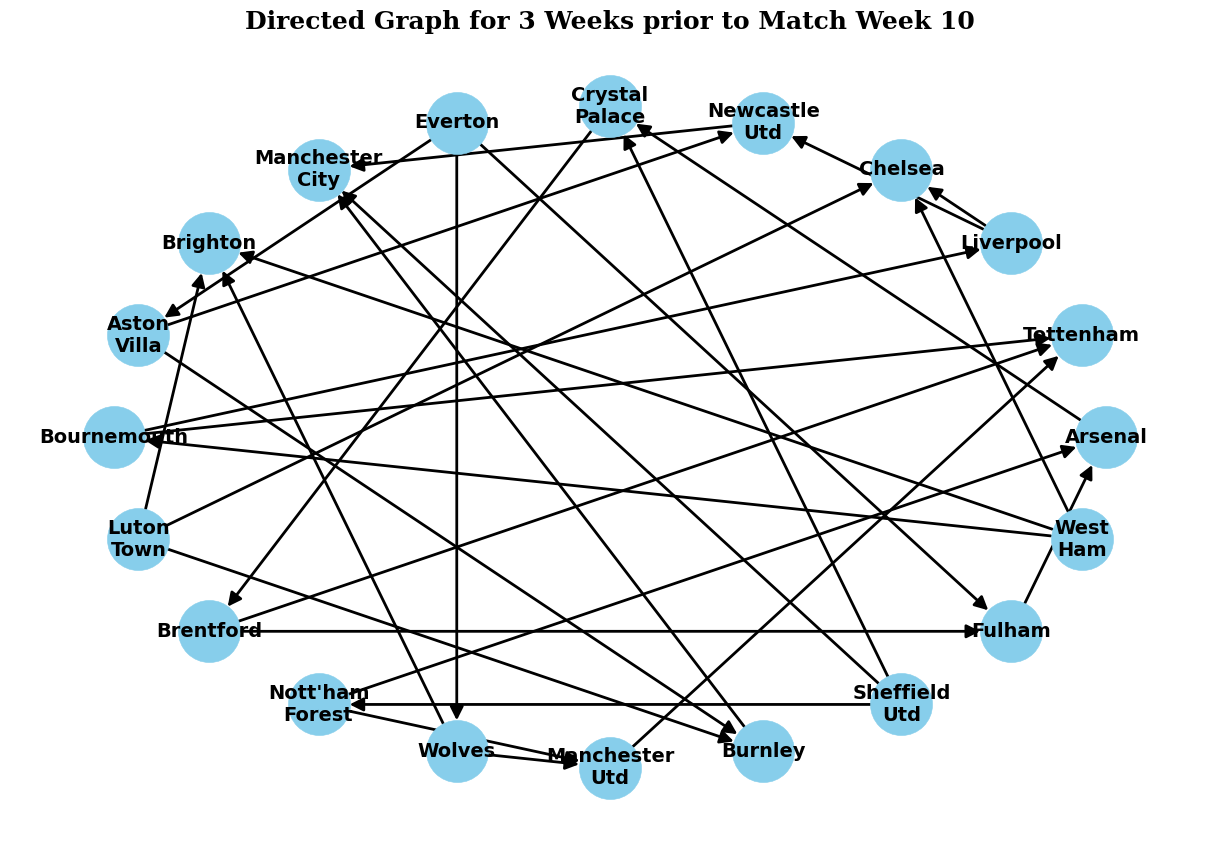

In [752]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import matplotlib as mpl


nodes = list(G.nodes)
random.shuffle(nodes)

# Update node labels to split multi-word names into two lines
node_labels = {node: node.replace(" ", "\n") for node in nodes}

# Create circular positions with randomized order
angle_step = 2 * np.pi / len(nodes)
pos = {node: (np.cos(i * angle_step), np.sin(i * angle_step)) for i, node in enumerate(nodes)}

# Edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')

# Create figure
plt.figure(figsize=(12, 8))

# Draw the graph
nx.draw(
    G, pos, labels=node_labels, node_color='skyblue', node_size=2000,
    font_size=14, font_color='black', font_weight='bold', edge_color='black',
    width=2, arrowsize=20, arrowstyle='-|>'
)

# Draw edge labels

# Add a title
plt.title("Directed Graph for 3 Weeks prior to Match Week 10", fontsize=18, fontweight='bold')

# Save as high-resolution image
plt.savefig("professional_team_graph.png", dpi=300, bbox_inches="tight")
plt.show()